# TWITTER SENTIMENT ANALYSIS 

### IMPORTING REQUIRED LIBRAIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
warnings.simplefilter('ignore')

### READING DATASET

In [63]:
dataset=pd.read_csv("C:/Users/reddy/OneDrive/Desktop/pantech/twitter/train.csv")

In [3]:
dataset

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [4]:
dataset.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
dataset.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


### CHECKING NULL VALUES

In [7]:
dataset.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [8]:
dataset.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [9]:
dataset['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

### VISUALIZATION

<AxesSubplot:xlabel='label', ylabel='count'>

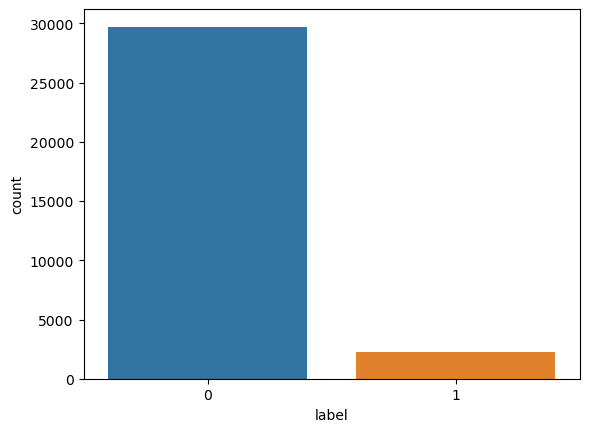

In [64]:
sns.countplot(data=dataset,x='label')

### IMPORTING STOPWORDS

In [10]:
from nltk.corpus import stopwords

In [11]:
sw=stopwords.words('english')

In [12]:
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
sw.append('user')

In [14]:
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### REMOVING SPECIAL CHARCTERS AND UNWANTED WORDS

In [15]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
ps=PorterStemmer()
tfidf=TfidfVectorizer()

In [17]:
def function(x):
    t=re.sub('[^A-Za-z0-9]',' ',x)
    t=word_tokenize(t)
    t=[i for i in t if i not in sw]
    t=[ps.stem(i) for i in t]
    t=" ".join(t)
    return t

In [18]:
dataset['tweet']=dataset['tweet'].apply(function)

In [19]:
dataset

,id,label,tweet
0,1,0,father dysfunct selfish drag kid dysfunct run
1,2,0,thank lyft credit use caus offer wheelchair va...
2,3,0,bihday majesti
3,4,0,model love u take u time ur
4,5,0,factsguid societi motiv
...,...,...,...
31957,31958,0,ate isz youuu
31958,31959,0,see nina turner airwav tri wrap mantl genuin h...
31959,31960,0,listen sad song monday morn otw work sad
31960,31961,1,sikh templ vandalis calgari wso condemn act


In [20]:
x=dataset['tweet']

### COUNTVECTORIZER

In [21]:
x=tfidf.fit_transform(x)

In [22]:
print(x)

  (0, 24905)	0.2395813057286982
  (0, 16011)	0.22607835602530815
  (0, 8739)	0.325641198086557
  (0, 25602)	0.3368248659821296
  (0, 9006)	0.7987838354404044
  (0, 10223)	0.18422969056646388
  (1, 11817)	0.3584147302540872
  (1, 8298)	0.3725600096100806
  (1, 22009)	0.3483784948316893
  (1, 30578)	0.32419698005329806
  (1, 31596)	0.3483784948316893
  (1, 21048)	0.26168867114052213
  (1, 5615)	0.2367878205382297
  (1, 30479)	0.1950713182941508
  (1, 7176)	0.29590642134131134
  (1, 17723)	0.33423321547569596
  (1, 28690)	0.15173787556296386
  (2, 17899)	0.8818511328958937
  (2, 3911)	0.4715279200749714
  (3, 30442)	0.5047630513596124
  (3, 29206)	0.4076000443474824
  (3, 28240)	0.4575917882649915
  (3, 17416)	0.3212971503715896
  (3, 19028)	0.5161921757500854
  (4, 19275)	0.45150470368310314
  :	:
  (31958, 29932)	0.2999381119632887
  (31958, 14461)	0.27864307315630177
  (31958, 11748)	0.2544198914749625
  (31958, 13372)	0.22683310816253324
  (31958, 29703)	0.17693575338407883
  (31958, 

In [23]:
y=dataset['label']
y

0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64

### DATA SPLITING

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
y_train

In [ ]:
y_test

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr=LogisticRegression()

### TRAINING MODEL

In [28]:
lr.fit(x_train,y_train)

LogisticRegression()

### PREDICTING VALUES

In [33]:
y1_pred=lr.predict(x_test)
y1_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### ACCURACY SCORE

In [36]:
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,roc_curve,auc

In [32]:
accuracy_score(y_test,y1_pred)

0.9482246206788675

In [38]:
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5947
           1       0.90      0.29      0.44       446

    accuracy                           0.95      6393
   macro avg       0.93      0.64      0.71      6393
weighted avg       0.95      0.95      0.94      6393



In [40]:
fpr,tpr,thr=roc_curve(y_test,y1_pred)

Text(0, 0.5, 'tpr')

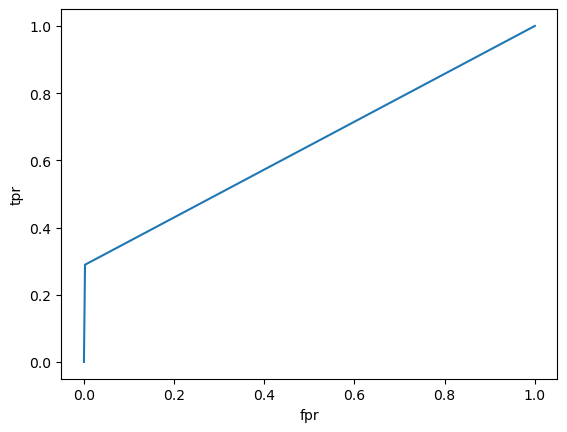

In [44]:
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')

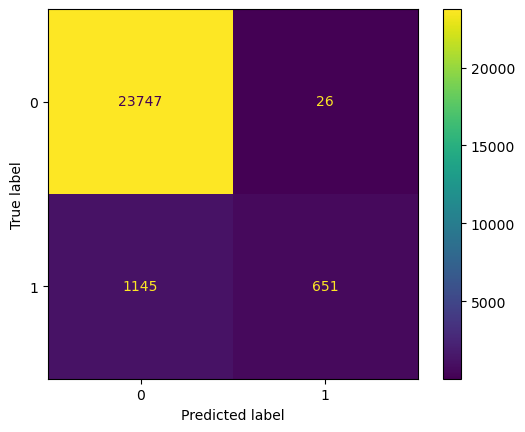

In [50]:
plot_confusion_matrix(lr,x_train,y_train)